***

The director of sales of the superstore wanted to get a better understanding of the variables that impact Profit. The company keeps a database containing information regarding about customer transactions over a 4 year interval (January 3, 2014 through December 30, 2017).

The information includes specific customer information including name, ID, city and state.  

Regarding the items purchased we have information on shipping time, the category the item falls in, the description of the item, as well as the quantity of the item purchased and discount given.  

The data was retrieved from kaggle.com.  Here is the link to the data.

https://www.kaggle.com/datasets/jacopoferretti/superstore-dataset

***


In [1]:
#To begin this analysis, we want to do an EDA to get a sense of which variables might impact Profit.  

#Load necessary packages 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Bring in the dataset

super = pd.read_csv('Kaggle_Superstore.csv', encoding='ISO-8859-1')
super



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
#In order to calculate the time it took to ship an order, we need to convert the "Order Date" and 
# "Ship Date" to datetime format.  

from datetime import date
super["Order Date"] = pd.to_datetime(super["Order Date"])
super["Ship Date"] = pd.to_datetime(super["Ship Date"])

In [5]:
#Check to now see two variables in the datetime format.  

super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
#We wanted to see how many years the data spans.  

super.describe()

#We observe that the orders were placed over a four year interval roughly...from January of 2014 to the end of 2017.   

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [7]:
super.isna().sum()

#There are no missing values in the dataset 

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
super["Ship Mode"].value_counts()

#The most common ship mode was Standard Class as seen in the barplot below.  

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

<Axes: xlabel='Ship Mode'>

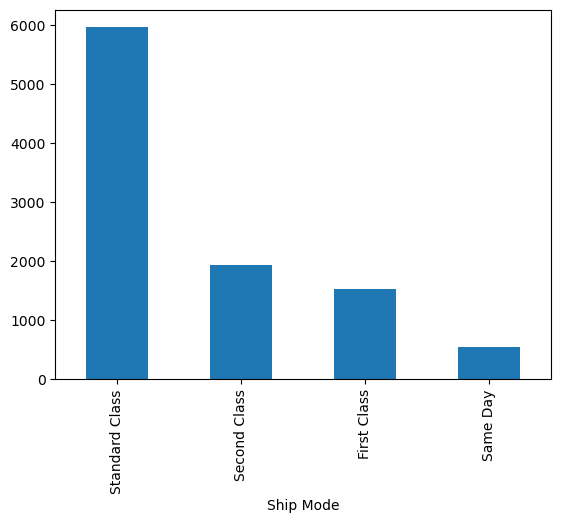

In [9]:
super["Ship Mode"].value_counts().plot(kind="bar")  

In [10]:
super["Segment"].value_counts()

#The most common segment is the Consumer Segment as shown in the barplot below.  

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

<Axes: xlabel='Segment'>

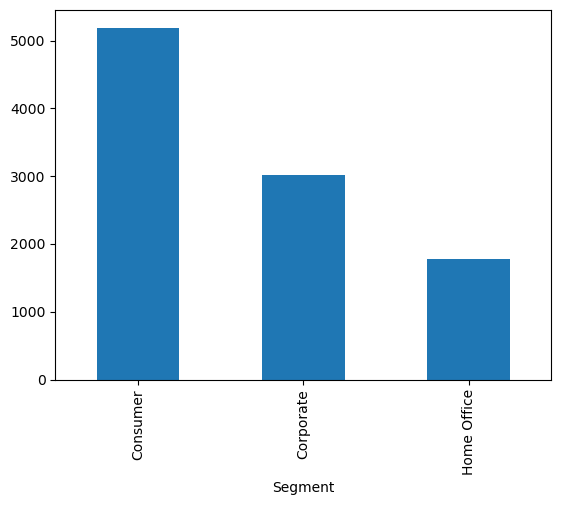

In [11]:
super["Segment"].value_counts().plot(kind="bar")

<Axes: xlabel='Region'>

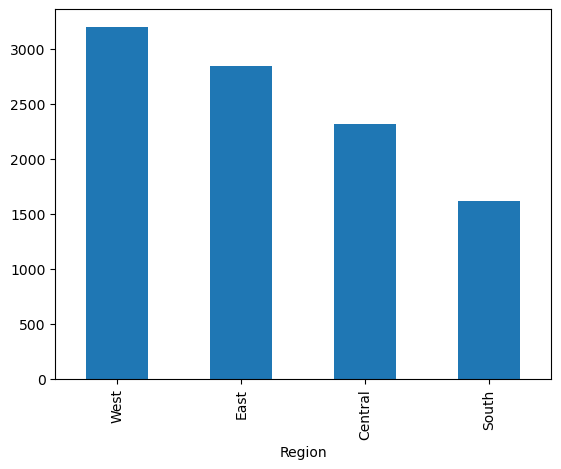

In [12]:
super["Region"].value_counts().plot(kind="bar")

#Most customers are either from the West or the East

In [13]:
super["Country"].value_counts()

#All customers are from the United States

Country
United States    9994
Name: count, dtype: int64

<Axes: xlabel='Category'>

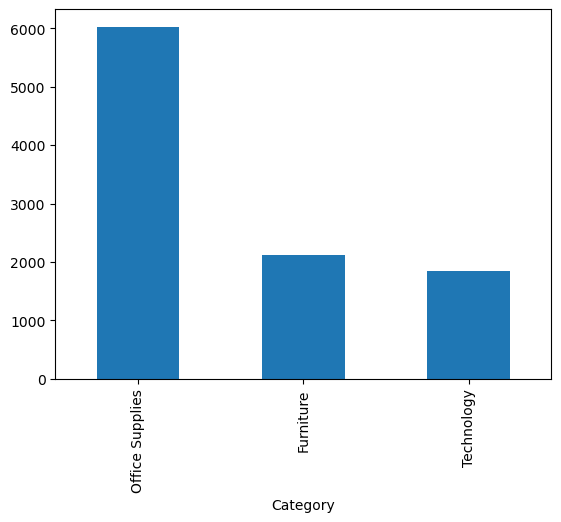

In [14]:
super["Category"].value_counts().plot(kind="bar")

#Office Supplies are the most frequent category by far

In [15]:
super["Sub-Category"].value_counts()

#The most common sub-categories are binders and paper.  

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

<Axes: xlabel='Sub-Category'>

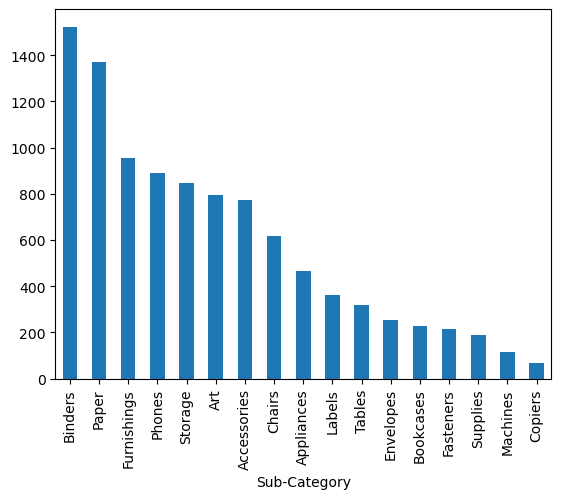

In [16]:
super["Sub-Category"].value_counts().plot(kind="bar")

In [17]:
super["State"].value_counts()

#The most common states are California and New York 

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

In [18]:
super["State"].nunique()

#All but one state are represented.  

49

In [19]:
#Let's examine the profit variable further.  

#The mean profit on all transactions is $28.65 

super["Profit"].mean()

28.65689630778467

In [20]:
#Below are the top five transaction values that had the highest profit.   

super["Profit"].sort_values(ascending=False).head(5)

6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Profit By Segment')

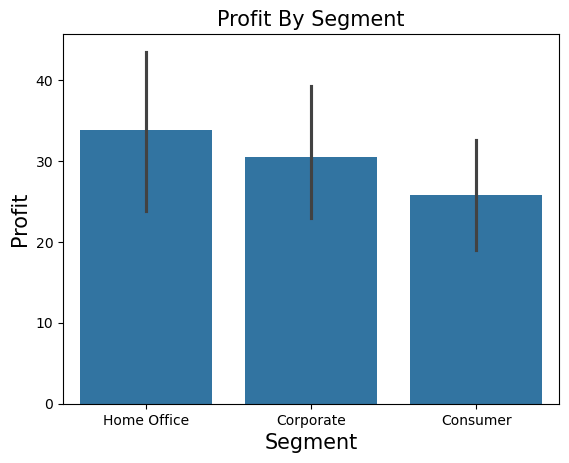

In [21]:
#Let's examine the profit data to look at which segment was most profitable.  

plot_order = super.groupby('Segment')['Profit'].mean().sort_values(ascending=False).index.values

sns.barplot(data=super, x='Segment',  y='Profit', order=plot_order)

plt.xlabel("Segment", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.title("Profit By Segment", fontsize=15)

#The highest mean profit was in the Home Office Segment

Text(0.5, 1.0, 'Profit By Category')

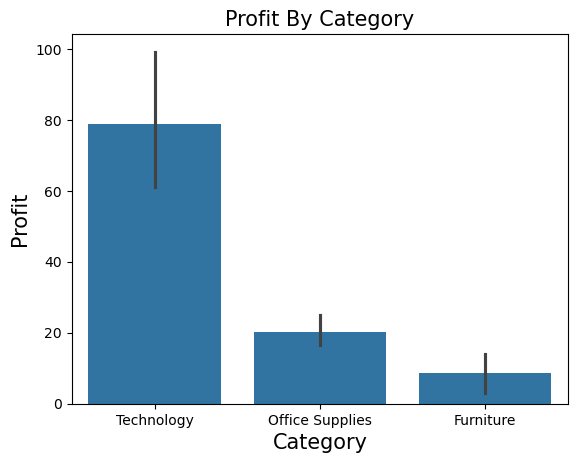

In [22]:
#Which categories have the highest profit?  

plot_order = super.groupby('Category')['Profit'].mean().sort_values(ascending=False).index.values
plot_order


sns.barplot(data=super, x='Category',  y='Profit', order=plot_order)

plt.xlabel("Category", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.title("Profit By Category", fontsize=15)

#The highest mean profit was in the Technology category



In [23]:
#Calculate the mean discount.  

meandiscount=super["Discount"].mean()
meandiscount

0.15620272163297977

In [24]:
#Which categories have the highest discount?

biggestdiscount=super.groupby('Category')['Discount'].mean()
biggestdiscount

#The highest mean discount is in the furniture category with an average discount of 17 percent 

Category
Furniture          0.173923
Office Supplies    0.157285
Technology         0.132323
Name: Discount, dtype: float64

In [25]:
from datetime import date
super["Order Date"] = pd.to_datetime(super["Order Date"])
super["Ship Date"] = pd.to_datetime(super["Ship Date"])

In [26]:
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [27]:
# We define the Ship_time as the Ship Date minus the Order date.  

super["Ship_time"] = (super["Ship Date"] - super["Order Date"])
super.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row ID         9994 non-null   int64          
 1   Order ID       9994 non-null   object         
 2   Order Date     9994 non-null   datetime64[ns] 
 3   Ship Date      9994 non-null   datetime64[ns] 
 4   Ship Mode      9994 non-null   object         
 5   Customer ID    9994 non-null   object         
 6   Customer Name  9994 non-null   object         
 7   Segment        9994 non-null   object         
 8   Country        9994 non-null   object         
 9   City           9994 non-null   object         
 10  State          9994 non-null   object         
 11  Postal Code    9994 non-null   int64          
 12  Region         9994 non-null   object         
 13  Product ID     9994 non-null   object         
 14  Category       9994 non-null   object         
 15  Sub-

In [28]:
super["Ship_time"] = (super["Ship Date"] - super["Order Date"])


super["Ship_time"].value_counts()

#The most frequent ship time was four days.  

Ship_time
4 days    2774
5 days    2169
2 days    1334
6 days    1203
3 days    1005
7 days     621
0 days     519
1 days     369
Name: count, dtype: int64

In [29]:
#Find the orders where the people received their product on the same day they placed the order.  

super[super["Ship_time"]=="0 days"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship_time
366,367,CA-2016-155516,2016-10-21,2016-10-21,Same Day,MK-17905,Michael Kennedy,Corporate,United States,Manchester,...,East,OFF-BI-10002412,Office Supplies,Binders,Wilson Jones Snap Scratch Pad Binder Tool fo...,23.200,4,0.0,10.4400,0 days
367,368,CA-2016-155516,2016-10-21,2016-10-21,Same Day,MK-17905,Michael Kennedy,Corporate,United States,Manchester,...,East,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,7.360,2,0.0,0.1472,0 days
368,369,CA-2016-155516,2016-10-21,2016-10-21,Same Day,MK-17905,Michael Kennedy,Corporate,United States,Manchester,...,East,OFF-ST-10002406,Office Supplies,Storage,Pizazz Global Quick File,104.790,7,0.0,29.3412,0 days
369,370,CA-2016-155516,2016-10-21,2016-10-21,Same Day,MK-17905,Michael Kennedy,Corporate,United States,Manchester,...,East,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",1043.920,4,0.0,271.4192,0 days
657,658,US-2016-156097,2016-09-19,2016-09-19,Same Day,EH-14125,Eugene Hildebrand,Home Office,United States,Aurora,...,Central,FUR-CH-10001215,Furniture,Chairs,Global Troy Executive Leather Low-Back Tilter,701.372,2,0.3,-50.0980,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,9872,CA-2017-146269,2017-10-06,2017-10-06,Same Day,MH-17455,Mark Hamilton,Consumer,United States,Chicago,...,Central,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,290.336,2,0.2,32.6628,0 days
9872,9873,CA-2017-146269,2017-10-06,2017-10-06,Same Day,MH-17455,Mark Hamilton,Consumer,United States,Chicago,...,Central,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,19.152,2,0.2,1.1970,0 days
9928,9929,CA-2016-129630,2016-09-04,2016-09-04,Same Day,IM-15055,Ionia McGrath,Consumer,United States,San Francisco,...,West,FUR-FU-10000260,Furniture,Furnishings,"6"" Cubicle Wall Clock, Black",24.270,3,0.0,8.7372,0 days
9929,9930,CA-2016-129630,2016-09-04,2016-09-04,Same Day,IM-15055,Ionia McGrath,Consumer,United States,San Francisco,...,West,TEC-CO-10003763,Technology,Copiers,Canon PC1060 Personal Laser Copier,2799.960,5,0.2,944.9865,0 days


In [30]:
#Which cities had the greatest profit?  

cityactivity = super.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5)
cityactivity

#New York, LA, and Seattle had the greatest total profit.  



City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64

In [31]:
cityactivity = super.groupby('City')['Profit'].sum().sort_values(ascending=False).nsmallest(5)
cityactivity

#Philadelphia and Houston had the greatest losses in profit.    

City
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
Name: Profit, dtype: float64

In [32]:
#We look at average profit rather than total profit.  

cityactivity = super.groupby('City')['Profit'].mean().sort_values(ascending=False).head(5)
cityactivity

#We see that Jamestown and Independence had the highest mean profit.  

City
Jamestown       642.885750
Independence    487.831500
Lafayette       323.173794
Minneapolis     296.721070
Appleton        277.383150
Name: Profit, dtype: float64

In [33]:
cityactivity = super.groupby('City')['Profit'].mean().sort_values(ascending=False).nsmallest(5)
cityactivity

#We see that the lowest mean profit belonged to Bethlehem...this city had the greatest loss.  

City
Bethlehem    -200.619160
Champaign    -182.352000
Oswego       -178.709200
Round Rock   -169.061614
Lancaster    -157.371052
Name: Profit, dtype: float64

In [34]:
#Which state had the greatest total profit?  

stateactivity = super.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5)
stateactivity

#California and New York had the greatest total profit.  


State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

In [35]:
#Which states had the lowest total profit?  

stateactivity = super.groupby('State')['Profit'].sum().sort_values(ascending=False).nsmallest(5)
stateactivity

#Texas, Ohio, and Pennsylvania had the greatest losses.    


State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Name: Profit, dtype: float64

In [36]:
#Which states had the greatest mean profit?  

stateactivity = super.groupby('State')['Profit'].mean().sort_values(ascending=False).head(5)
stateactivity

#Vermont had the greatest mean profit.  


State
Vermont         204.088936
Rhode Island    130.100523
Indiana         123.375411
Montana         122.221900
Minnesota       121.608847
Name: Profit, dtype: float64

In [37]:
#Which states had the lowest mean profit?  

stateactivity = super.groupby('State')['Profit'].mean().sort_values(ascending=False).nsmallest(5)
stateactivity

#Ohio and Colorado had the lowest average profit.  


State
Ohio             -36.186304
Colorado         -35.867351
North Carolina   -30.083985
Tennessee        -29.189583
Pennsylvania     -26.507598
Name: Profit, dtype: float64

In [38]:
#Now, we explore profit by region. 

#Which region had the greatest total profit?  

regionactivity = super.groupby('Region')['Profit'].sum().sort_values(ascending=False).head(5)
regionactivity

#Profit was highest in the West region.  It was lowest in the Central region.  

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

In [39]:
#Which region had the highest mean profit?  

regionactivity = super.groupby('Region')['Profit'].mean().sort_values(ascending=False).nlargest(5)
regionactivity


#The West and the East regions had the highest average profit.  

Region
West       33.849032
East       32.135808
South      28.857673
Central    17.092709
Name: Profit, dtype: float64

In [40]:
#Now, let's look at the data from a customer level...

#How many unique customers are there?

super["Customer Name"].nunique()

#We see there are 793 unique customers 

793

In [41]:
#Did most customers buy products in one category or multiple categories?

#The table below shows customer name, the number of purchases they made, and 
#the number of categories their purchases fell into.  

mult= super.groupby(super["Customer Name"]).Category.agg([ 
                                               "count", 
                                             "nunique"])

mult



,count,nunique
Customer Name,,
Aaron Bergman,6,3
Aaron Hawkins,11,3
Aaron Smayling,10,3
Adam Bellavance,18,3
Adam Hart,20,3
...,...,...
Xylona Preis,28,3
Yana Sorensen,12,3
Yoseph Carroll,8,3


In [42]:
mult["nunique"].value_counts()

#We see that most customers made purchases in three different categories.  

nunique
3    617
2    155
1     21
Name: count, dtype: int64

In [43]:
#average number of transactions per customer

mult["count"].mean()

#Average number of transactions per customer is 12.6




12.602774274905423

In [44]:
#Did most customers buy products in one category or multiple categories?

#The table below shows customer name, the number of purchases they made, and 
#the number of categories their purchases fell into.  

subcatmult= super.groupby(super["Customer Name"])["Sub-Category"].agg([ 
                                               "count", 
                                             "nunique"])

subcatmult

,count,nunique
Customer Name,,
Aaron Bergman,6,5
Aaron Hawkins,11,10
Aaron Smayling,10,6
Adam Bellavance,18,8
Adam Hart,20,11
...,...,...
Xylona Preis,28,9
Yana Sorensen,12,8
Yoseph Carroll,8,6


In [45]:
subcatmult["nunique"].value_counts()

#We see that most customers made purchases in 7 or 8 different sub-categories.  

nunique
7     119
8     114
6     103
9      99
10     94
5      71
11     53
4      46
3      27
12     22
13     20
2      15
1       7
15      2
14      1
Name: count, dtype: int64

In [46]:
#Top 10 customers by profit
profitbycust = super.groupby('Customer Name')['Profit'].mean().sort_values(ascending=False).nlargest(10)
profitbycust

#These are the top 10 customers who produced the highest total profit.  

Customer Name
Tamara Chand            748.443658
Mitch Willingham        555.172000
Hunter Lopez            511.129927
Tom Ashbrook            470.378830
Christopher Martinez    389.989040
Raymond Buch            387.560883
Andy Reiter             320.513422
Bill Shonely            290.673822
Adrian Barton           272.240275
Sanjit Chand            261.700541
Name: Profit, dtype: float64

In [47]:
profitbycust = super.groupby('Customer Name')['Profit'].mean().sort_values(ascending=False).nsmallest(10)
profitbycust

#These are the lowest 10 customers in terms of profit. 

Customer Name
Cindy Stewart    -736.265500
Grant Thornton   -684.776483
Sharelle Roach   -370.434933
Paul Knutson     -266.235000
Jim Radford      -261.721500
Luke Foster      -223.998562
Henry Goldwyn    -164.586088
Nathan Cano      -157.486229
Sean Miller      -132.049287
Christine Phan   -123.353527
Name: Profit, dtype: float64

In [48]:
profitbycust = super.groupby('Customer Name')['Profit'].mean()
profitbycust

#These are the mean profits for all the unique customers.  

Customer Name
Aaron Bergman          21.557750
Aaron Hawkins          33.201382
Aaron Smayling        -25.357460
Adam Bellavance       114.143806
Adam Hart              14.059450
                         ...    
Xylona Preis           22.186786
Yana Sorensen         148.191025
Yoseph Carroll        163.203625
Zuschuss Carroll      -33.295129
Zuschuss Donatelli     27.681189
Name: Profit, Length: 793, dtype: float64

In [49]:
profitbycust[profitbycust>0]

#There were 638 customers (of the 793) who were profitable

Customer Name
Aaron Bergman          21.557750
Aaron Hawkins          33.201382
Adam Bellavance       114.143806
Adam Hart              14.059450
Adam Shillingsburg      2.581496
                         ...    
William Brown          19.306246
Xylona Preis           22.186786
Yana Sorensen         148.191025
Yoseph Carroll        163.203625
Zuschuss Donatelli     27.681189
Name: Profit, Length: 638, dtype: float64

In [50]:
profitbycust[profitbycust<=0]

#There were 155 customers who were not profitable

Customer Name
Aaron Smayling     -25.357460
Adrian Hane         -0.144662
Alan Haines        -47.318863
Alex Avila         -32.989318
Alex Grayson        -0.570789
                      ...    
Victoria Pisteka   -72.769771
Victoria Wilson    -48.592472
Vivek Grady         -8.722167
Vivek Sundaresam   -32.851163
Zuschuss Carroll   -33.295129
Name: Profit, Length: 155, dtype: float64

In [51]:
#Let's take another look at our data
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row ID         9994 non-null   int64          
 1   Order ID       9994 non-null   object         
 2   Order Date     9994 non-null   datetime64[ns] 
 3   Ship Date      9994 non-null   datetime64[ns] 
 4   Ship Mode      9994 non-null   object         
 5   Customer ID    9994 non-null   object         
 6   Customer Name  9994 non-null   object         
 7   Segment        9994 non-null   object         
 8   Country        9994 non-null   object         
 9   City           9994 non-null   object         
 10  State          9994 non-null   object         
 11  Postal Code    9994 non-null   int64          
 12  Region         9994 non-null   object         
 13  Product ID     9994 non-null   object         
 14  Category       9994 non-null   object         
 15  Sub-

In [52]:
#Extracts the first position from the ship time variable so we can use it as a variable 

super['Days_ship_time'] = super['Ship_time'].astype(str).str[0]


In [53]:
super['Days_ship_time']

0       3
1       3
2       4
3       7
4       7
       ..
9989    2
9990    5
9991    5
9992    5
9993    5
Name: Days_ship_time, Length: 9994, dtype: object

In [54]:
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Row ID          9994 non-null   int64          
 1   Order ID        9994 non-null   object         
 2   Order Date      9994 non-null   datetime64[ns] 
 3   Ship Date       9994 non-null   datetime64[ns] 
 4   Ship Mode       9994 non-null   object         
 5   Customer ID     9994 non-null   object         
 6   Customer Name   9994 non-null   object         
 7   Segment         9994 non-null   object         
 8   Country         9994 non-null   object         
 9   City            9994 non-null   object         
 10  State           9994 non-null   object         
 11  Postal Code     9994 non-null   int64          
 12  Region          9994 non-null   object         
 13  Product ID      9994 non-null   object         
 14  Category        9994 non-null   object  

In [55]:
#Turn Days_ship_time to an integer to use in calculations

super["Days_ship_time"]=super["Days_ship_time"].astype(int)

In [56]:
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Row ID          9994 non-null   int64          
 1   Order ID        9994 non-null   object         
 2   Order Date      9994 non-null   datetime64[ns] 
 3   Ship Date       9994 non-null   datetime64[ns] 
 4   Ship Mode       9994 non-null   object         
 5   Customer ID     9994 non-null   object         
 6   Customer Name   9994 non-null   object         
 7   Segment         9994 non-null   object         
 8   Country         9994 non-null   object         
 9   City            9994 non-null   object         
 10  State           9994 non-null   object         
 11  Postal Code     9994 non-null   int64          
 12  Region          9994 non-null   object         
 13  Product ID      9994 non-null   object         
 14  Category        9994 non-null   object  

In [57]:
#Find the mean of the Days_ship_time overall

super["Days_ship_time"].mean()


3.958174904942966

In [58]:
#On average, shipping time was 3.95 days.  To see the breakdown more, let's use value counts.  

super["Days_ship_time"].value_counts()

Days_ship_time
4    2774
5    2169
2    1334
6    1203
3    1005
7     621
0     519
1     369
Name: count, dtype: int64

In [59]:
#Which categories have the fastest ship time?  

plot_order5 = super.groupby('Category')['Days_ship_time'].mean()
plot_order5

#We see that all three categories have similar averages for Days_ship_time 

Category
Furniture          3.917020
Office Supplies    3.983405
Technology         3.923119
Name: Days_ship_time, dtype: float64

In [60]:
super.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship_time,Days_ship_time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,7


In [61]:
profitbyShip_mode=super.groupby('Ship Mode')['Profit'].mean().sort_values(ascending=False)
profitbyShip_mode

#We see that First Class had the highest profit

Ship Mode
First Class       31.839948
Second Class      29.535545
Same Day          29.266591
Standard Class    27.494770
Name: Profit, dtype: float64

In [62]:
#We now create a new variable called profit per unit


super["ProfitperUnit"] = super["Profit"]/super["Quantity"]

In [63]:
super.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship_time,Days_ship_time,ProfitperUnit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,3,20.9568
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,3,73.1940
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,4,3.4357
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,7,-76.6062
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,7,1.2582


In [64]:
#Which category had the highest per unit profit?  

profbyunit=super.groupby('Category')['ProfitperUnit'].mean().sort_values(ascending=False)
profbyunit

#We see that technology had the highest profit per unit 

Category
Technology         20.993948
Office Supplies     5.819061
Furniture           1.935615
Name: ProfitperUnit, dtype: float64

In [65]:
#Find the most common product sold within each category

mostcommonproduct=super.groupby('Category')['Product Name'].value_counts()
mostcommonproduct

Category    Product Name                                                             
Furniture   KI Adjustable-Height Table                                                   18
            Staple-based wall hangings                                                   16
            Situations Contoured Folding Chairs, 4/Set                                   15
            Eldon Wave Desk Accessories                                                  14
            Global Wood Trimmed Manager's Task Chair, Khaki                              14
                                                                                         ..
Technology  RCA ViSYS 25423RE1 Corded phone                                               1
            RCA H5401RE1 DECT 6.0 4-Line Cordless Handset With Caller ID/Call Waiting     1
            Pyle PRT45 Retro Home Telephone                                               1
            Memorex Mini Travel Drive 4 GB USB 2.0 Flash Drive                        

In [66]:
#drop the shiptime variable 

super = super.drop('Ship_time', axis=1)

In [67]:
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country         9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9994 non-null   int64         
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [68]:
#How many unique product names are there by category 

uniqueproduct=super.groupby('Category')['Product Name'].nunique()
uniqueproduct

#Office supplies has the greatest number of unique products.  

Category
Furniture           380
Office Supplies    1058
Technology          412
Name: Product Name, dtype: int64

In [69]:
#How many unique product names are there by subcategory?

uniqueproduct2=super.groupby('Sub-Category')['Product Name'].nunique().sort_values(ascending=False)
uniqueproduct2

#The subcategory with the highest distinct values of a given product name is Paper.  

#This means there are 277 unique product names in the paper sub-category.  

Sub-Category
Paper          277
Binders        211
Phones         189
Furnishings    186
Art            157
Accessories    147
Storage        132
Appliances      97
Chairs          88
Labels          70
Machines        63
Tables          56
Bookcases       50
Envelopes       44
Supplies        36
Fasteners       34
Copiers         13
Name: Product Name, dtype: int64

In [70]:
#  We are now building a correlation matrix and heatmap of all numeric predictors.  

#To do this, all categorical predictors of interest must be transformed to dummy varialbes.  

In [71]:
#Create a copy of super as super2


super2 = super.copy()

super2 = super2.drop("Row ID", axis='columns')


super2 = pd.get_dummies(super2, dtype=int,
                     columns = ['Ship Mode', 'Segment', 'Category', 'Region'])

super2.info()

numercorr = super2.corr(numeric_only=True)
numercorr



#Next, we do a heatmap of correlations 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order ID                  9994 non-null   object        
 1   Order Date                9994 non-null   datetime64[ns]
 2   Ship Date                 9994 non-null   datetime64[ns]
 3   Customer ID               9994 non-null   object        
 4   Customer Name             9994 non-null   object        
 5   Country                   9994 non-null   object        
 6   City                      9994 non-null   object        
 7   State                     9994 non-null   object        
 8   Postal Code               9994 non-null   int64         
 9   Product ID                9994 non-null   object        
 10  Sub-Category              9994 non-null   object        
 11  Product Name              9994 non-null   object        
 12  Sales               

,Postal Code,Sales,Quantity,Discount,Profit,Days_ship_time,ProfitperUnit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,...,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Region_Central,Region_East,Region_South,Region_West
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.009771,-0.032230,-0.005650,0.017536,0.006679,...,0.014900,-0.014534,-0.002011,0.008680,-0.011509,0.005364,0.174213,-0.739832,-0.283963,0.782202
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064,-0.007354,0.447319,-0.000931,0.002515,0.004915,...,-0.010216,0.004187,0.008310,0.099922,-0.218568,0.170260,-0.012437,0.008588,0.008431,-0.003708
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253,0.018298,-0.007209,-0.016870,-0.019391,0.005938,...,-0.013562,0.016011,-0.001505,-0.001065,0.006436,-0.006991,-0.002468,-0.017405,0.008528,0.012334
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487,0.000408,-0.232313,0.017368,-0.004422,-0.041214,...,0.009761,0.006457,-0.020483,0.044552,0.006461,-0.055077,0.224314,-0.033142,-0.019068,-0.155915
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000,-0.004649,0.912199,0.005795,0.000624,0.001844,...,-0.012515,0.005056,0.010268,-0.044221,-0.043822,0.101825,-0.027167,0.009376,0.000377,0.015222
Days_ship_time,-0.009771,-0.007354,0.018298,0.000408,-0.004649,1.000000,-0.004188,-0.433308,-0.536868,-0.202575,...,-0.009728,0.018618,-0.009636,-0.012224,0.017793,-0.009552,0.031472,-0.017871,-0.000038,-0.011170
ProfitperUnit,-0.032230,0.447319,-0.007209,-0.232313,0.912199,-0.004188,1.000000,0.008115,0.000658,0.003047,...,-0.015586,0.002965,0.016784,-0.054279,-0.043523,0.112042,-0.031778,0.009494,0.003338,0.016943
Ship Mode_First Class,-0.005650,-0.000931,-0.016870,0.017368,0.005795,-0.433308,0.008115,1.000000,-0.102225,-0.209645,...,-0.016570,0.012225,0.006960,0.000403,-0.009836,0.011974,-0.038399,0.031768,-0.011516,0.013122
Ship Mode_Same Day,0.017536,0.002515,-0.019391,-0.004422,0.000624,-0.536868,0.000658,-0.102225,1.000000,-0.117828,...,0.030888,-0.048146,0.017439,0.004060,-0.001271,-0.002675,-0.006495,0.000255,-0.006011,0.010379
Ship Mode_Second Class,0.006679,0.004915,0.005938,-0.041214,0.001844,-0.202575,0.003047,-0.209645,-0.117828,1.000000,...,0.004929,0.011700,-0.020465,0.008788,-0.010724,0.004260,0.007722,-0.013588,0.009409,-0.001277


In [72]:
super2.info()

#At this point, having removed the sub-category dummy variable conversion, we have 31 variables.  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order ID                  9994 non-null   object        
 1   Order Date                9994 non-null   datetime64[ns]
 2   Ship Date                 9994 non-null   datetime64[ns]
 3   Customer ID               9994 non-null   object        
 4   Customer Name             9994 non-null   object        
 5   Country                   9994 non-null   object        
 6   City                      9994 non-null   object        
 7   State                     9994 non-null   object        
 8   Postal Code               9994 non-null   int64         
 9   Product ID                9994 non-null   object        
 10  Sub-Category              9994 non-null   object        
 11  Product Name              9994 non-null   object        
 12  Sales               

In [73]:
#Only select the numeric variables

super3 = super2.select_dtypes(include=np.number)

In [74]:
super3.head()

,Postal Code,Sales,Quantity,Discount,Profit,Days_ship_time,ProfitperUnit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,...,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Region_Central,Region_East,Region_South,Region_West
0,42420,261.9600,2,0.00,41.9136,3,20.9568,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,42420,731.9400,3,0.00,219.5820,3,73.1940,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,90036,14.6200,2,0.00,6.8714,4,3.4357,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,33311,957.5775,5,0.45,-383.0310,7,-76.6062,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,33311,22.3680,2,0.20,2.5164,7,1.2582,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [75]:
#Due to multicollinearity between Profit and ProfitPerUnit, the latter was dropped.  
super3=super3.drop('ProfitperUnit', axis=1)
super3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Postal Code               9994 non-null   int64  
 1   Sales                     9994 non-null   float64
 2   Quantity                  9994 non-null   int64  
 3   Discount                  9994 non-null   float64
 4   Profit                    9994 non-null   float64
 5   Days_ship_time            9994 non-null   int32  
 6   Ship Mode_First Class     9994 non-null   int32  
 7   Ship Mode_Same Day        9994 non-null   int32  
 8   Ship Mode_Second Class    9994 non-null   int32  
 9   Ship Mode_Standard Class  9994 non-null   int32  
 10  Segment_Consumer          9994 non-null   int32  
 11  Segment_Corporate         9994 non-null   int32  
 12  Segment_Home Office       9994 non-null   int32  
 13  Category_Furniture        9994 non-null   int32  
 14  Category

In [76]:
#Turning Profitable into an integer variable 

def made_money(value):
  if value > 0:
     return(1)
  else:
    return(0)

super3['Profitable'] = super3['Profit'].apply(made_money)
super3["Profitable"]=super3["Profitable"].astype("int")
super3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Postal Code               9994 non-null   int64  
 1   Sales                     9994 non-null   float64
 2   Quantity                  9994 non-null   int64  
 3   Discount                  9994 non-null   float64
 4   Profit                    9994 non-null   float64
 5   Days_ship_time            9994 non-null   int32  
 6   Ship Mode_First Class     9994 non-null   int32  
 7   Ship Mode_Same Day        9994 non-null   int32  
 8   Ship Mode_Second Class    9994 non-null   int32  
 9   Ship Mode_Standard Class  9994 non-null   int32  
 10  Segment_Consumer          9994 non-null   int32  
 11  Segment_Corporate         9994 non-null   int32  
 12  Segment_Home Office       9994 non-null   int32  
 13  Category_Furniture        9994 non-null   int32  
 14  Category

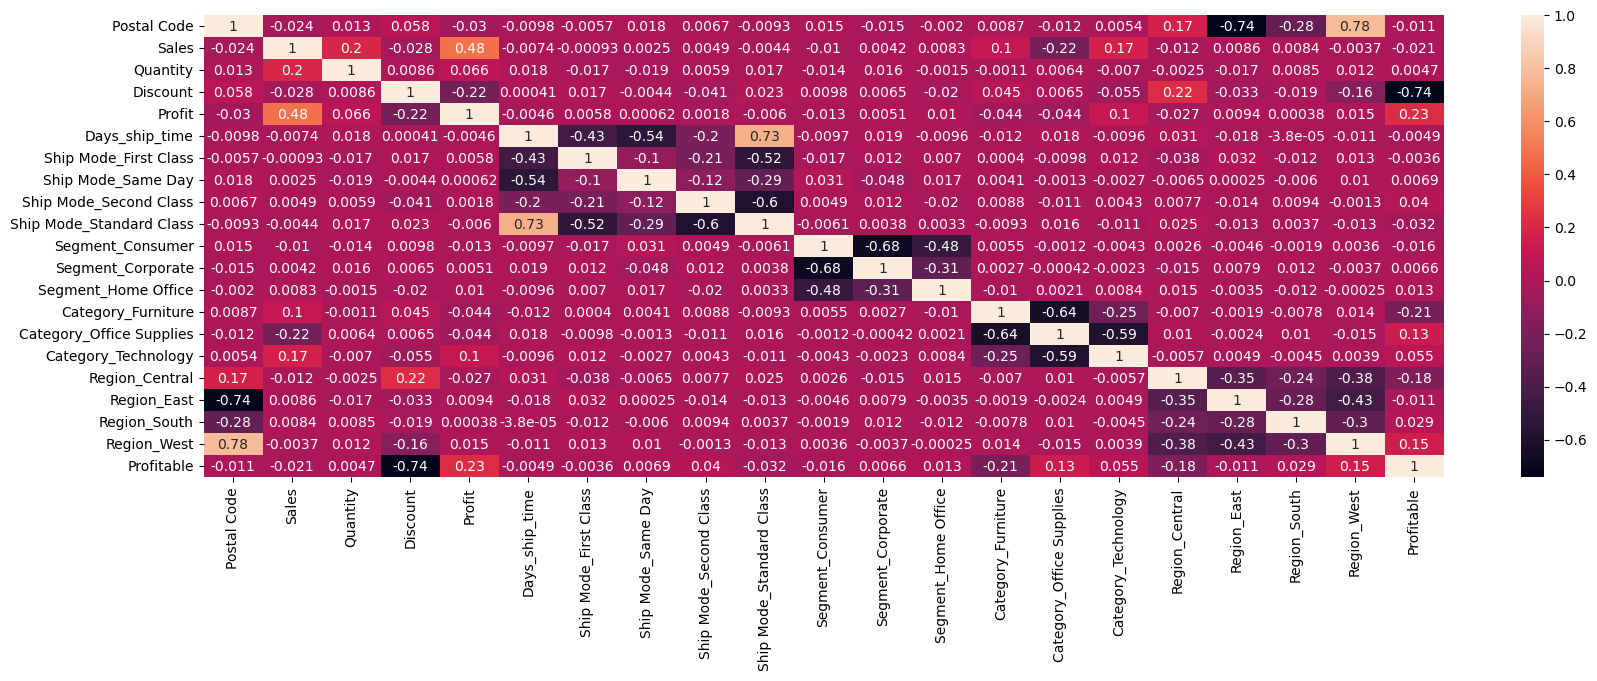

In [77]:
#Heatmap of correlations

plt.figure(figsize=(20,6))

sns.heatmap(super3.corr(), annot=
           True);

#We see here that as discount rate increases, profitability decreases.  

### INITIAL IMPRESSIONS FROM EDA

<u>Customers</u>

* Most customers are from the West or East
* Everyone is from the United States 
* The data consists of 793 unique customers 
* Of those 793 customers, the vast majority had purchases spanning three categories 
* The average number of transactions per customer is 12.6
* 638 customers were profitable.  The remaining 155 were not profitable

<u>Categories and Segments</u>

* The most frequent category is Office supplies
* The most common sub-categories are Binders and Paper
* The most profitable category was Technology
* The most profitable segment was Home Office
* The most common segment is consumer segment

<u>Shipping</u>

* The most common ship mode was standard class 
* On average, shipping time was 3.95 days

<u>Profit and Discount</u>

* The mean profit of all transactions was $28.65  
* New York, LA, and Seattle had the greatest profit  
* Philadelphia and Houston had the greatest losses in profit 
* California and New York were the states with the greatest total profit  
* Texas and Ohio and Pennsylvania had the greatest losses  
* Vermont and Rhode Island had the greatest mean profit 
* Ohio and Colorado had the lowest mean profit 
* The most frequent transactions are from California and New York
* The mean discount is 15.6 percent
* The category of furniture has the highest mean discount at 17.4 percent
* As discount rate increases, profitability decreases 


LOGISTIC REGRESSION MODEL AND FEATURE IMPORTANCE

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [79]:
#Creation of the feature set and the sole response of "Profitable"

#Profit was removed due to high multicolinearity with "Profitable"

#The final step creates 4 subsets based on an 80/20 train/test split.  

from sklearn.model_selection import train_test_split
from sklearn import preprocessing


X= super3.drop(columns=['Profit', 'Profitable'])

y = super3["Profitable"]

# standardization of input data
scaler = preprocessing.StandardScaler()

X_normalized_values = scaler.fit_transform(X.values)

X_normalized = pd.DataFrame(X_normalized_values, columns=X.columns, index=X.index)

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.10, stratify = y, random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression

# initialize logistic regression model and fit to training data
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# obtain coefficients
coefficients = logreg.coef_.reshape(-1)

# present features and absolute values of coefficients in a dataframe
logreg_fi_df = pd.DataFrame(data = {'Feature': X.columns, 'Importance': np.abs(coefficients)}).sort_values(by = "Importance", ascending = False)
logreg_fi_df

#We see that discount is the feature of highest importance by far.  

,Feature,Importance
3,Discount,3.853699
12,Category_Furniture,0.452509
13,Category_Office Supplies,0.285109
0,Postal Code,0.215363
18,Region_West,0.207016
8,Ship Mode_Standard Class,0.122361
15,Region_Central,0.118733
14,Category_Technology,0.117288
4,Days_ship_time,0.114887
16,Region_East,0.109959


In [81]:
#Predicting and obtaining an accuracy score on the test data

y_pred = logreg.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 93.60000000000001


Text(0.5, 36.72222222222221, 'Predicted Values')

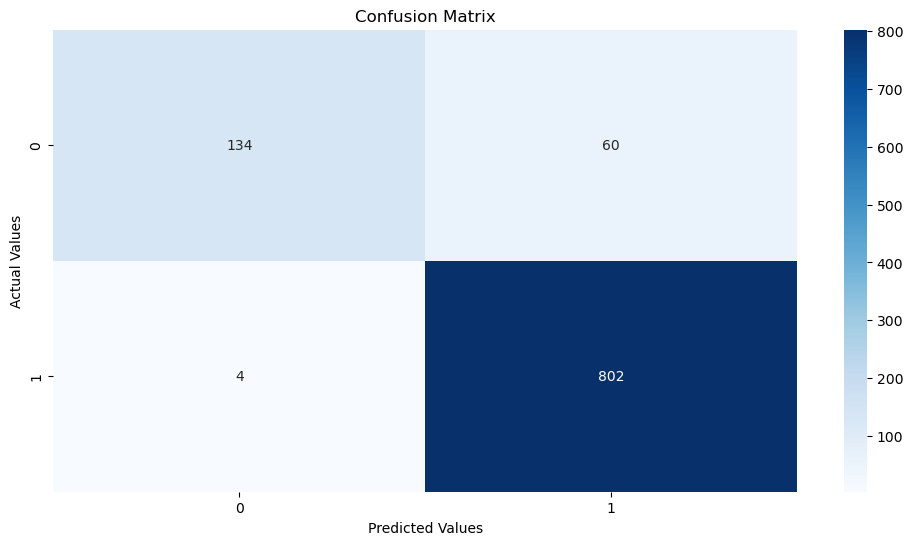

In [82]:
#Obtaining the confusion matrix we see an accuracy on the test set of 94.2 percent.  

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [83]:
#Create a classification report 

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#The model fits the data well.   

              precision    recall  f1-score   support

           0       0.97      0.69      0.81       194
           1       0.93      1.00      0.96       806

    accuracy                           0.94      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.94      0.94      0.93      1000



In [84]:
from sklearn.ensemble import GradientBoostingClassifier

# initialize gradient boosted trees and fit to training data
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

# calculate feature importance
feature_importance = clf.feature_importances_

# present features and standardized decrease in gini impurity in a dataframe
gbt_fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
gbt_fi_df = gbt_fi_df.sort_values(by='Importance', ascending=False)
gbt_fi_df

#Once again, discount is the feature of highest importance.   

,Feature,Importance
3,Discount,0.921158
1,Sales,0.037579
14,Category_Technology,0.014717
12,Category_Furniture,0.014704
0,Postal Code,0.004632
2,Quantity,0.003286
15,Region_Central,0.001835
13,Category_Office Supplies,0.000421
17,Region_South,0.000417
4,Days_ship_time,0.000371


## LOGISTIC REGRESSION KEY FINDINGS

* The accuracy of the model was 93 percent indicating the model fits the data well.  
* Discount is the feature of most importance.  
* Using an alternative gradient boosting classifier, we once again confirm that discount is the most important feature in terms of impacting profit.  
